In [1]:
url = 'https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/data/chipo.tsv'

In [2]:
# 프렌차이즈 데이터 분석
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(url,sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
#요약정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
#주문번호를 문자열로 변경
df['order_id'] = df['order_id'].astype(str)

In [8]:
#요약통계
df.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [22]:
# 연속형 데이터 범주형 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [26]:
df2 = df.drop(['choice_description'],axis=1)
df2.head()

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,$2.39
1,1,1,Izze,$3.39
2,1,1,Nantucket Nectar,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,$2.39
4,2,2,Chicken Bowl,$16.98


In [30]:
df2.item_price = df2.item_price.apply(lambda x : x[1:]).astype(float)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    4622 non-null   object 
 1   quantity    4622 non-null   int64  
 2   item_name   4622 non-null   object 
 3   item_price  4622 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 144.6+ KB


In [33]:
# 가장 많은 주문이 들어온 메뉴 - 고객이 선호하는 메뉴
# 1. df2.item_name의 빈도수
# 2. 메뉴별 수량의 합

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [58]:
# 넘파이의 unique를 이용한 빈도수-> 곧 주문량이라고 볼수 있음
temp = np.unique( df2.item_name, return_counts=True)
temp

(array(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
        'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl',
        'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito',
        'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl',
        'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad',
        'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl',
        'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad',
        'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
        'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
        'Chips and Mild Fresh Tomato Salsa',
        'Chips and Roasted Chili Corn Salsa',
        'Chips and Roasted Chili-Corn Salsa',
        'Chips and Tomatillo Green Chili Salsa',
        'Chips and Tomatillo Red Chili Salsa',
        'Chips and Tomatillo-Green Chili Salsa',
        'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
        'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bow

In [ ]:
# argsort를 이용해서 정렬된 데이터의 인덱스를 구할수 있다.. 그래서 
#1 .temp의 [1]을 numpy argsort를 이용해서 오름차순으로 정렬하고
#2. 1에서 나온 인덱스 순으로 [o]에 메뉴이름이 있으니.. 해당 메뉴를 추출한다.

In [59]:
desc_idx =  np.argsort( temp[1])[::-1]

In [60]:
# 주문량이 많은 메뉴들
temp[0][desc_idx]

array(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chicken Salad Bowl',
       'Chips and Fresh Tomato Salsa', 'Canned Soda', 'Side of Chips',
       'Veggie Burrito', 'Barbacoa Burrito', 'Veggie Bowl',
       'Carnitas Bowl', 'Barbacoa Bowl', 'Carnitas Burrito',
       'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Izze',
       'Chips and Roasted Chili-Corn Salsa', 'Veggie Salad Bowl',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad',
       'Veggie Soft Tacos', 'Carnitas Cri

In [61]:
# 인기메뉴 top10
temp[0][desc_idx][:10]

array(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chicken Salad Bowl'],
      dtype=object)

In [77]:
# 2. 메뉴별 수량의 합  -- 올바른 분석 법
temp2 = df2.groupby(['item_name'])['quantity'].sum()
temp2

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [63]:
#인기메뉴 top 10
temp2.sort_values(ascending=False)[:10]

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [66]:
temp[0][desc_idx][:10]

array(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chicken Salad Bowl'],
      dtype=object)

In [69]:
# 가장많이 주문한 메뉴
# 메뉴당 주문 갯수
temp2.sort_values(ascending=False)[:6]

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Chips                  230
Name: quantity, dtype: int64

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
temp3 = temp2.to_frame()
temp3 = temp3.reset_index()
temp3.head()

,item_name,quantity
0,6 Pack Soft Drink,55
1,Barbacoa Bowl,66
2,Barbacoa Burrito,91
3,Barbacoa Crispy Tacos,12
4,Barbacoa Salad Bowl,10


In [106]:
temp4 = temp3.sort_values(by='quantity',ascending=False)
temp4.head()

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


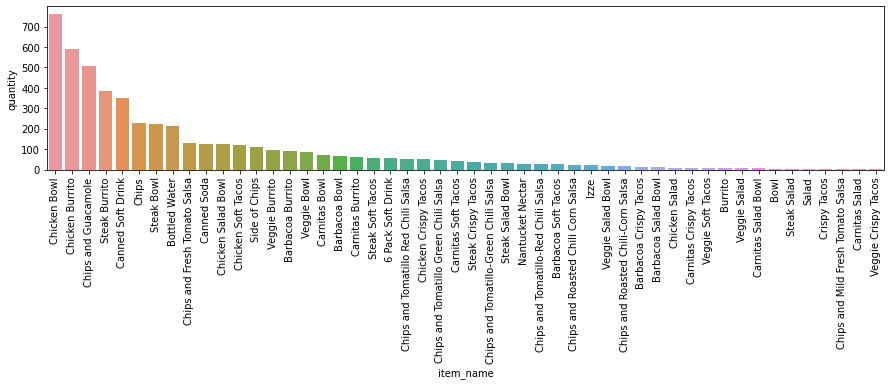

In [107]:
plt.figure(figsize=(15,3))
plt.xticks(rotation = 90)
sns.barplot(data=temp4,x='item_name',y='quantity')
plt.show()
# ax = sns.barplot(data=temp3,x='item_name',y='quantity')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [116]:
# 주문한 메뉴별 가격의 합
df2_2 = df2.groupby(['item_name'])['item_price'].sum()
df2_2 = df2_2.sort_values(ascending=False)
df2_2.head()

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Name: item_price, dtype: float64

In [126]:
df2_3 =  df2_2.to_frame().reset_index()
df2_3.head()

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19
4,Chips and Guacamole,2201.04


In [127]:
df2_4 = df2_3.sort_values(by='item_price',ascending=False)
df2_4.head()

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19
4,Chips and Guacamole,2201.04


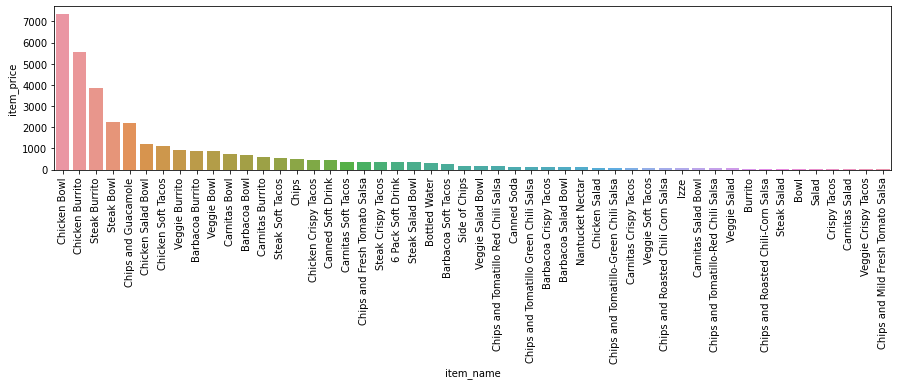

In [128]:
plt.figure(figsize=(15,3))
plt.xticks(rotation = 90)
sns.barplot(data=df2_4,x='item_name',y='item_price')
plt.show()